##**Problem Statement**
### **Text Analysis on Movie Dataset**

#### **Importing all necessary libraries**

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

#### **Loading the Dataset**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DL/nlp/movies.csv')
df

,id,movie,review,Unnamed: 3,Unnamed: 4
0,1,Alive in Wonderland,Tim Burton’s“Alice in Wonderland” was probably...,NaN,NaN
1,2,A Beautifil Mind,Beautiful Mind is a biographical movie about J...,"Such movies, telling us about the life of a fa...",NaN
2,3,Wanted,The well-known Universal Studios film company ...,The atmosphere of comics entirely suited to th...,NaN
3,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...,"Entangled evidence, amazing deduction of Holme...",The plot is as follows: Holmes (Robert Downey ...
4,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...,"Entangled evidence, amazing deduction of Holme...",The plot is as follows: Holmes (Robert Downey ...
5,5,Kites,"“Kites” is not a traditional Indian movie, but...","This story is very exciting. Moreover, it is a...",NaN


#### **Merging Columns**

In [3]:
df['full_review'] = df[df.columns[2:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)

df.head()

,id,movie,review,Unnamed: 3,Unnamed: 4,full_review
0,1,Alive in Wonderland,Tim Burton’s“Alice in Wonderland” was probably...,NaN,NaN,Tim Burton’s“Alice in Wonderland” was probably...
1,2,A Beautifil Mind,Beautiful Mind is a biographical movie about J...,"Such movies, telling us about the life of a fa...",NaN,Beautiful Mind is a biographical movie about J...
2,3,Wanted,The well-known Universal Studios film company ...,The atmosphere of comics entirely suited to th...,NaN,The well-known Universal Studios film company ...
3,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...,"Entangled evidence, amazing deduction of Holme...",The plot is as follows: Holmes (Robert Downey ...,Robert Downey Jr. and Jude Law tried to embody...
4,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...,"Entangled evidence, amazing deduction of Holme...",The plot is as follows: Holmes (Robert Downey ...,Robert Downey Jr. and Jude Law tried to embody...


In [4]:
df.iloc[3,5]

'Robert Downey Jr. and Jude Law tried to embody unforgettable images of Sherlock Holmes and Doctor Watson in this bold new film version. In G. Ritchie’s “Sherlock Holmes” the legendary detective shows not only his unmatched intelligence, but also considerable physical training as well. Entangled evidence, amazing deduction of Holmes and his lively mind combine into an exciting series of grueling events. The director Guy Ritchie represents a fascinating adaptation of one of the world’s best detectives. Meet the new Sherlock Holmes! The plot is as follows: Holmes (Robert Downey Jr.) is rather depressed because of the possibility of Watson’s (Jude Law) marriage. His mood is also compounded by the absence of interesting cases. Trying to relax, he invents a silencer, does not go out of his room, participates in fights without rules and plays violin.'

In [5]:
movie_df= df.iloc[:,[0,1,5]]
movie_df.head()

,id,movie,full_review
0,1,Alive in Wonderland,Tim Burton’s“Alice in Wonderland” was probably...
1,2,A Beautifil Mind,Beautiful Mind is a biographical movie about J...
2,3,Wanted,The well-known Universal Studios film company ...
3,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...
4,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...


In [6]:
from collections import Counter 
def count_words_fast(text):      
    text = text.lower()  
    skips = [".", ", ", ":", ";", "'", '"']  
    for ch in skips:  
        text = text.replace(ch, "")  
    word_counts = Counter(text.split(" "))  
    return word_counts  
  

In [7]:
movie_df['full_review'].apply(count_words_fast)

0    {'tim': 1, 'burton’s“alice': 1, 'in': 4, 'wond...
1    {'beautiful': 2, 'mind': 2, 'is': 2, 'a': 5, '...
2    {'the': 12, 'well-known': 1, 'universal': 1, '...
3    {'robert': 1, 'downey': 2, 'jr': 1, 'and': 4, ...
4    {'robert': 1, 'downey': 2, 'jr': 1, 'and': 4, ...
5    {'“kites”': 1, 'is': 7, 'not': 3, 'a': 6, 'tra...
Name: full_review, dtype: object

In [8]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [9]:
def preprocess(raw_text):
    
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer()
    
    stop_words = set(stopwords.words('english'))
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word) 
        stemmed_words.append(word)
    
    return " ".join(stemmed_words)


In [10]:
movie_df['prep'] = movie_df['full_review'].apply(preprocess)
movie_df.head()

,id,movie,full_review,prep
0,1,Alive in Wonderland,Tim Burton’s“Alice in Wonderland” was probably...,tim burton alic wonderland probabl anticip mov...
1,2,A Beautifil Mind,Beautiful Mind is a biographical movie about J...,beauti mind biograph movi john forb nash junio...
2,3,Wanted,The well-known Universal Studios film company ...,well known univers studio film compani plan sh...
3,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...,robert downey jr jude law tri embodi unforgett...
4,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...,robert downey jr jude law tri embodi unforgett...


#### **Most Common Words**

In [11]:
Counter(" ".join(movie_df["prep"]).split()).most_common(10)

[('holm', 10),
 ('film', 9),
 ('movi', 8),
 ('one', 6),
 ('sherlock', 6),
 ('new', 5),
 ('mind', 4),
 ('hard', 4),
 ('robert', 4),
 ('downey', 4)]

In [12]:
all_words = '' 

for i in movie_df["prep"]: 

    tokens = i.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
                        

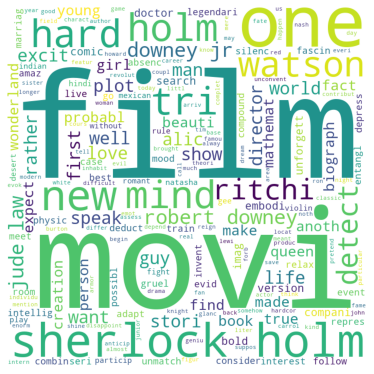

In [13]:
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()